In [23]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux_1
%run Pipeline//ULAB_ML_Pipeline
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

pd.set_option('max_columns',100)

In [24]:
df_violations = read_file('ICIS-AIR_DOWNLOADS/ICIS-AIR_VIOLATION_HISTORY.csv')
violations_copy = df_violations.copy()

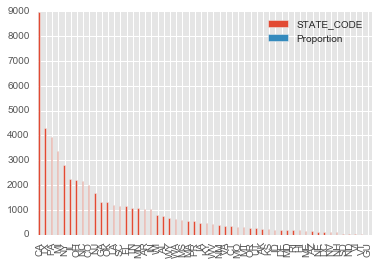

In [74]:
count_per_group_viol.plot(kind='bar')

In [4]:
#interest_var = ['PGM_SYS_ID','ACTIVITY_ID','AGENCY_TYPE_DESC','STATE_CODE','AIR_LCON_CODE','COMP_DETERMINATION_UID','ENF_RESPONSE_POLICY_CODE','PROGRAM_CODES']
date_types = ['year','month']
date_format ='%m-%d-%Y'
interest_vars = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
date_col = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
get_occupied_frame(df_violations, interest_vars ,date_format, date_types)
hpv_correct = df_violations.HPV_DAYZERO_DATE_year > '2007'
frv_correct = df_violations.EARLIEST_FRV_DETERM_DATE_year >'2007'
df_violations = df_violations[hpv_correct | frv_correct]

['year', 'month']


In [5]:
# DAYS TO RESOLVE 

df_violations_hpv = df_violations.dropna(subset=['HPV_RESOLVED_DATE_datetime','HPV_DAYZERO_DATE_datetime'])
df_violations_hpv['DAYS_TO_RESOLVE'] = pd.to_datetime(df_violations_hpv['HPV_RESOLVED_DATE_datetime']).sub(pd.to_datetime(df_violations_hpv['HPV_DAYZERO_DATE_datetime']))
df_violations_hpv['DAYS_TO_RESOLVE_INT'] = df_violations_hpv.DAYS_TO_RESOLVE.apply(day_to_int)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [285]:
#df_violations_hpv.head()
df_hpv_daystoResolve = df_violations_hpv[['DAYS_TO_RESOLVE','DAYS_TO_RESOLVE_INT']]

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


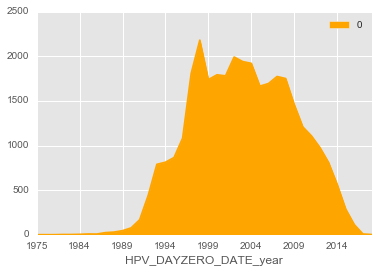

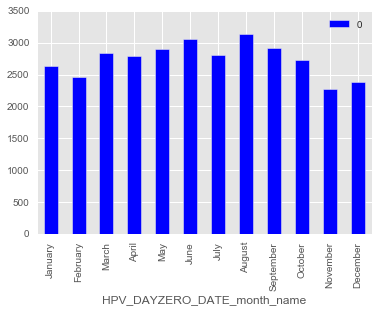

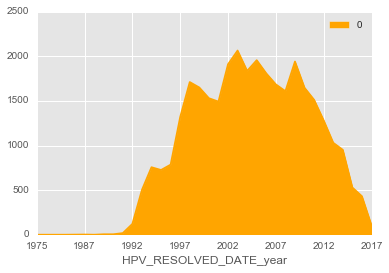

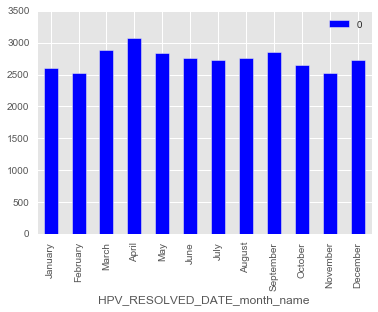

In [119]:
create_date_charts(df_violations_hpv, date_types, hpv_atts)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


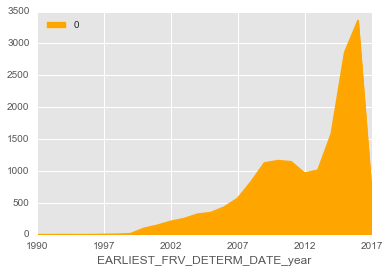

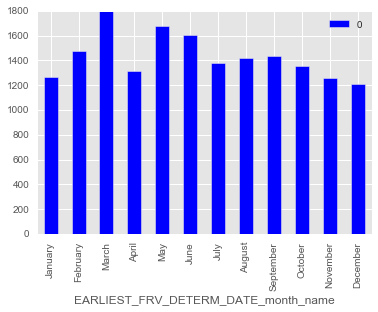

In [178]:
create_date_charts(df_violations_frv, date_types, frv_atts)

In [7]:
titlev_certs = read_file('data/ICIS-AIR_downloads/ICIS-AIR_TITLEV_CERTS.csv')

In [8]:
date_format ='%m/%d/%Y'
date_attributes = ['ACTUAL_END_DATE']
date_types = ['year','month']
get_occupied_frame(titlev_certs,date_attributes,date_format, date_types)

['year', 'month']


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


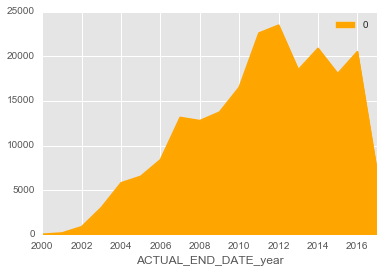

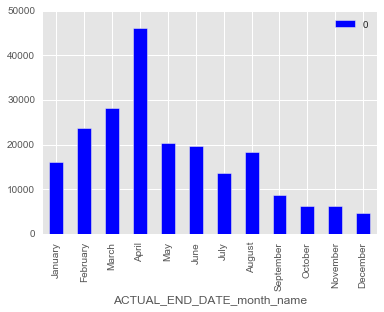

In [245]:
actual_date = ['ACTUAL_END_DATE']
create_date_charts(titlev_certs_flag, date_types, actual_date)

In [29]:
df_fces_pces = read_file('ICIS-AIR_downloads/ICIS-AIR_FCES_PCES.csv')

In [14]:
#how to groupby id and year and recollect features lost during groupby
violations_by_year = df_violations.groupby(['PGM_SYS_ID','HPV_DAYZERO_DATE_year']).size().to_frame().reset_index()
violations_by_year = violations_by_year.merge(df_violations, how='inner', on=['PGM_SYS_ID','HPV_DAYZERO_DATE_year'])

In [31]:
date_types = ['year','month']
date_format ='%m-%d-%Y'
#interest_vars = ['ACTUAL_END_DATE']
date_col = ['ACTUAL_END_DATE']
get_occupied_frame(df_fces_pces, date_col ,date_format, date_types)
actual_correct = df_fces_pces.ACTUAL_END_DATE_year >= '2000'
#frv_correct = df_violations.EARLIEST_FRV_DETERM_DATE_year >'2007'
df_fces_pces = df_fces_pces[actual_correct]
fces_by_year = df_fces_pces.groupby(['PGM_SYS_ID','ACTUAL_END_DATE_year']).size().to_frame().reset_index()
fces_by_year = fces_by_year.merge(df_fces_pces, how='inner', on=['PGM_SYS_ID','ACTUAL_END_DATE_year'])

['year', 'month']


/Users/andrewyaspan/Documents/ml_project/ML_Project/Pipeline/upload_and_vizualize.py:204: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort([date_column+'_month_num']).groupby([date_column+'_month_name'], sort=False).size().to_frame().plot(kind='bar',color ='blue')


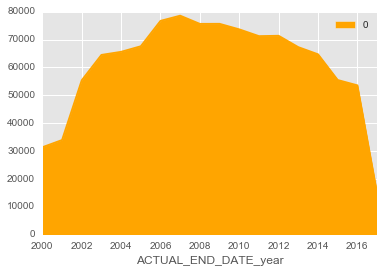

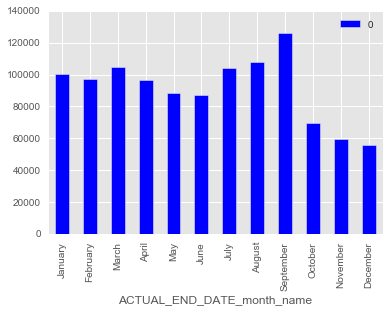

In [32]:
actual_date = ['ACTUAL_END_DATE']
create_date_charts(fces_by_year, date_types, actual_date)